## Predict fare of Airline tickets using machine learning

In this project we will predict tickets price of airline using Machine Learning. We're using Kaggle's Flight Price Prediction data. 

In [2]:
# Import all the needed modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
%matplotlib inline

### Data


In [33]:
# Load data
train_data=pd.read_excel(r"C:\Users\DELL\Downloads\Data_Train.xlsx")

In [34]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [35]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [36]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [37]:
train_data.shape

(10683, 11)

**So our training data has 10683 rows and have 10 feature variables and 1 label or target column**

### Data Preprocessing

In [38]:
# Check for missing values 
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [39]:
# drop that missing value row
train_data.dropna(inplace=True)
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [40]:
train_data.shape

(10682, 11)

In [41]:
train_data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [42]:
# Let's change datatypes of Date_of_Journey to datetime datatype
train_data["Date_of_Journey"]=pd.to_datetime(train_data["Date_of_Journey"])

In [43]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [44]:
def change_to_datetime(col):
    train_data[col]=pd.to_datetime(train_data[col])

In [45]:
for i in ["Dep_Time","Arrival_Time"]:
    change_to_datetime(i)
    

In [46]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10341 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [47]:
train_data["Journey_day"]=train_data["Date_of_Journey"].dt.day
train_data["Journey_month"]=train_data["Date_of_Journey"].dt.month

In [48]:
train_data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-01-28 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24.0,3.0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-01-28 05:50:00,2022-01-28 13:15:00,7h 25m,2 stops,No info,7662,5.0,1.0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-01-28 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6.0,9.0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-01-28 18:05:00,2022-01-28 23:30:00,5h 25m,1 stop,No info,6218,5.0,12.0
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-01-28 16:50:00,2022-01-28 21:35:00,4h 45m,1 stop,No info,13302,3.0,1.0
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,2022-01-28 09:00:00,2022-01-28 11:25:00,2h 25m,non-stop,No info,3873,24.0,6.0
6,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,2022-01-28 18:55:00,2022-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,3.0,12.0
7,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,2022-01-28 08:00:00,2022-03-02 05:05:00,21h 5m,1 stop,No info,22270,3.0,1.0
8,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,2022-01-28 08:55:00,2022-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,3.0,12.0
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,2022-01-28 11:25:00,2022-01-28 19:15:00,7h 50m,1 stop,No info,8625,27.0,5.0


In [49]:
# Drop the Date of Journey Column
train_data.drop("Date_of_Journey",axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-01-28 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24.0,3.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-01-28 05:50:00,2022-01-28 13:15:00,7h 25m,2 stops,No info,7662,5.0,1.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-01-28 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6.0,9.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-01-28 18:05:00,2022-01-28 23:30:00,5h 25m,1 stop,No info,6218,5.0,12.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-01-28 16:50:00,2022-01-28 21:35:00,4h 45m,1 stop,No info,13302,3.0,1.0


In [50]:
# Drop the Additional_Info Column as it's not adding any value to the data
train_data.drop("Additional_Info",axis=1,inplace=True)

In [51]:
def extract_minute(df,col):
    df[col+"_minutes"]=df[col].dt.minute


def extract_hour(df,col):
    df[col+"_hour"]=df[col].dt.hour
    
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)
    
extract_minute(train_data,"Dep_Time")    
extract_hour(train_data,"Dep_Time")
drop_column(train_data,"Dep_Time")

In [52]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_minutes,Dep_Time_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,3897,24.0,3.0,20,22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-01-28 13:15:00,7h 25m,2 stops,7662,5.0,1.0,50,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-06-10 04:25:00,19h,2 stops,13882,6.0,9.0,25,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-01-28 23:30:00,5h 25m,1 stop,6218,5.0,12.0,5,18
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-01-28 21:35:00,4h 45m,1 stop,13302,3.0,1.0,50,16


In [53]:
extract_minute(train_data,"Arrival_Time")    
extract_hour(train_data,"Arrival_Time")
drop_column(train_data,"Arrival_Time")

In [54]:
train_data.head()      

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_minutes,Dep_Time_hour,Arrival_Time_minutes,Arrival_Time_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,24.0,3.0,20,22,10,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,5.0,1.0,50,5,15,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,13882,6.0,9.0,25,9,25,4
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218,5.0,12.0,5,18,30,23
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302,3.0,1.0,50,16,35,21


## Now do it for duration column

In [56]:
def hour(x):
    return x.split(" ")[0][0:-1]

def minute(x):
    return x.split(" ")[1][0:-1]

In [57]:
train_data.Duration[0]
        

'2h 50m'

In [62]:
if "m" not in train_data.Duration[2]:
    train_data.Duration[2]= train_data.Duration[2] + " 0m"

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
duration=list(train_data["Duration"])

In [69]:
for i in range(len(duration)):
    if "m"  not in duration[i]:
        duration[i]=duration[i] + " 0m"
    elif "h"  not in duration[i]:
        duration[i]="0h " + duration[i]
        

In [71]:
train_data["Duration"]=duration

In [72]:
train_data["Duration_hours"]=train_data["Duration"].apply(hour)

In [73]:
train_data["Duration_minutes"]=train_data["Duration"].apply(minute)

In [74]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_minutes,Dep_Time_hour,Arrival_Time_minutes,Arrival_Time_hour,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,24.0,3.0,20,22,10,1,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,5.0,1.0,50,5,15,13,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,13882,6.0,9.0,25,9,25,4,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218,5.0,12.0,5,18,30,23,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302,3.0,1.0,50,16,35,21,4,45


In [77]:
train_data["Duration_hours"]=train_data["Duration_hours"].astype(int)
train_data["Duration_minutes"]=train_data["Duration_minutes"].astype(int)
train_data.drop("Duration",axis=1,inplace=True)

In [78]:
cat_col=[col for col in train_data.columns if train_data[col].dtype=="O"]
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops']

In [80]:
cont_col=[col for col in train_data.columns if train_data[col].dtype!="O"]
cont_col

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_minutes',
 'Dep_Time_hour',
 'Arrival_Time_minutes',
 'Arrival_Time_hour',
 'Duration_hours',
 'Duration_minutes']

## Let's convert our categorical data into numeral data with the help of one hot encoding and label encoding

In [81]:
categorical=train_data[cat_col]

In [82]:
categorical["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

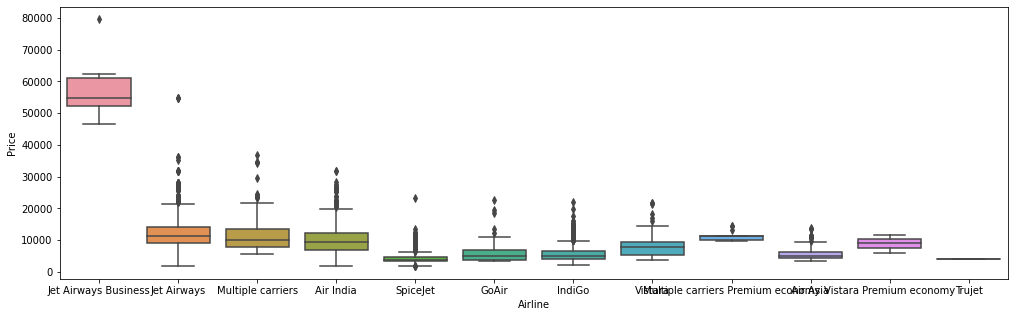

In [84]:
plt.figure(figsize=(17,5))
sns.boxplot(x="Airline",y="Price",data=train_data.sort_values("Price",ascending=False))

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

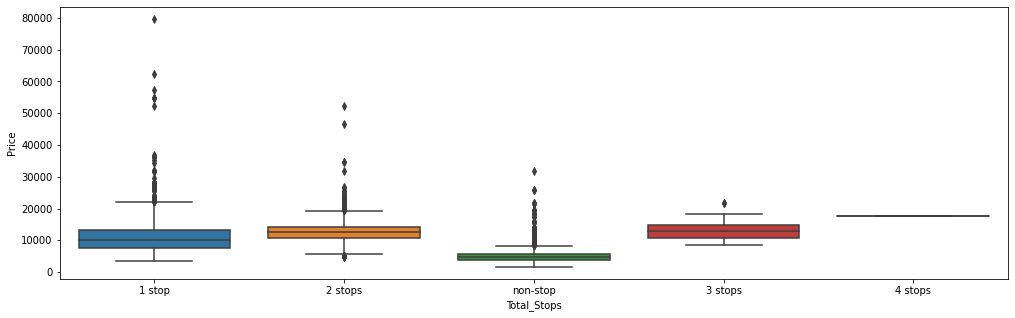

In [86]:
plt.figure(figsize=(17,5))
sns.boxplot(x="Total_Stops",y="Price",data=train_data.sort_values("Price",ascending=False))

In [87]:
Airline=pd.get_dummies(categorical["Airline"],drop_first=True)

In [90]:
categorical["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

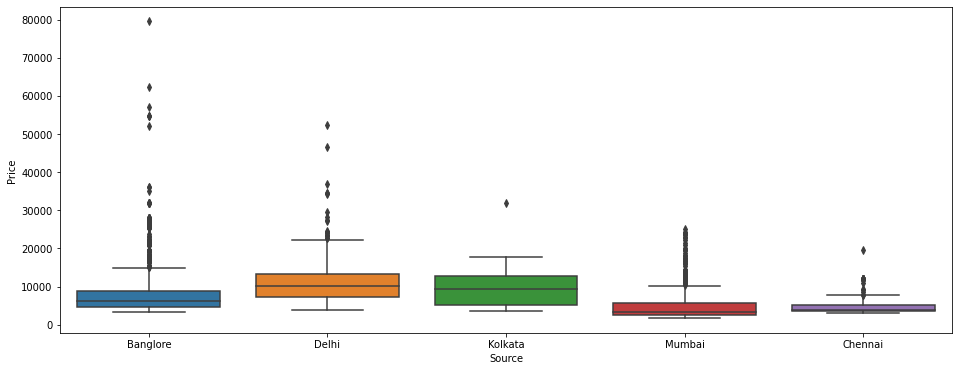

In [91]:
plt.figure(figsize=(16,6))
sns.boxplot(x="Source",y="Price",data=train_data.sort_values("Price",ascending=False))

In [92]:
Source=pd.get_dummies(categorical["Source"],drop_first=True)

In [95]:
categorical["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64